

# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be analyzing data from over 100,000 medical appointment records in Brazil to detect the trends of patients who show up at the hospital for their scheduled medical appointments and those who don't show up, and how certain variables associate with the trends.

### General Properties

>_Samples = 110527_

>_Associated variables (characteristics) = 14_

### _Questions_
__What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?__

_This question will be addressed by the following sub-questions:_

> 1. How do the numbers of patients who showed up compare with the numbers of those who did not show up to their appointments?
2. How do the ages of patients who showed up to their appointments compare with the ages of patients who did not show up?
3. Were patients enrolled in the Bolsa Familia welfare program more frequent to appointments than those who weren't?
4. Which gender showed up more frequently for medical appointments?
5. On which days of the week did patients show up the most for medical appointments?
6. Is there any correlation between the days patients registered for appointments and how often they made it to their appointments?
7. Did the patients that received SMS texts show up more often than those that didn't receive texts?
8. Which neighbourhoods showed up more often and which neighbourhoods showed up least often for medical appointments?
9. Do medical conditions determine how frequent patients show up for medical appointments?
10. What is the correlation between the patients' medical conditions and their ages?
                                                                                                                              

In [1]:
## First we import all the packages to be used for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load in the data, inspect the dataset and check for cleanliness.

In [2]:
## Read in the csv data and print a few lines to preview the dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Since we are focused on finding out if patients showed up or not for scheduled medical appointments, __No-show__ is the dependent variable for our analysis.

We will rename the columns for accuracy.

In [3]:
## Check the dimensions of our dataset

df.shape

(110527, 14)

In [4]:
## Inspect for null values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null values present in the dataset.

In [6]:
## Get the summary statistics of the data

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We see that the average age of the patients is 37years.

However, minimum & maximum age values appear to be outside normal range, could possibly be outliers.

In [7]:
## Investigate for age values below 0

df[df['Age'] < 0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
## Investigate for age values above 100

df[df['Age'] > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [9]:
df.query('Age < 0  | Age > 100').count()

PatientId         8
AppointmentID     8
Gender            8
ScheduledDay      8
AppointmentDay    8
Age               8
Neighbourhood     8
Scholarship       8
Hipertension      8
Diabetes          8
Alcoholism        8
Handcap           8
SMS_received      8
No-show           8
dtype: int64

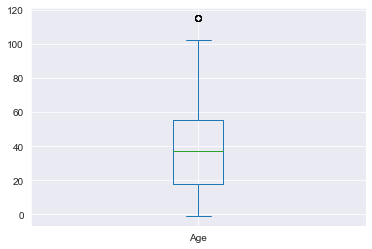

In [10]:
df['Age'].plot(kind='box');

Ages 115 appear to be outliers and age 0 is abnormal. We would drop age 0 and any age above 100 for our analysis.

In [11]:
## Check for unique values in the dataset

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
## Check the datatypes of each column

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

We will convert the 'No-show' from __'Yes'__ & __'No'__ _(str)_ to __'1'__ & __'0'__ _(int)_ respectively for consistency & easier analysis with plots.

We will also convert 'ScheduledDay' & 'AppointmentDay' from _(str)_ to _(datetime)_ format.

Also, 'PatientId' will be dropped from our dataset as it is not relevant for our analysis.

In [13]:
## Check for duplicate rows

sum(df.duplicated())

0

There are also no duplicate values in our dataset.

So far the dataset looks fairly clean.


### Data Cleaning 
> Here, we will trim the data and clean the dataset for analysis. 

In [14]:
## Rename the columns & print first few lines to confirm changes

new_labels = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns = new_labels
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [15]:
## Drop ages below 0 and above 100 from the dataset and check to confirm changes

df.drop(df[(df.age < 0) | (df.age > 100)].index, inplace = True)

In [16]:
df.query('age < 0  | age > 100').count()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

In [17]:
## Drop 'patient_id' column from the dataset

df.drop(['patient_id'], axis=1, inplace=True)

In [18]:
## Check new dimensions of dataset

df.shape

(110519, 13)

In [19]:
## Convert no_show values from 'Yes' & 'No' to '1' & '0' respectively

df['no_show'] = df['no_show'].replace({'No': 0, 'Yes': 1})
df.head(2)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0


In [20]:
## Convert no_show from string to int

df['no_show'] = df['no_show'].astype('int64')
df.dtypes

appointment_id      int64
gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship         int64
hypertension        int64
diabetes            int64
alcoholism          int64
handicap            int64
sms_received        int64
no_show             int64
dtype: object

In [21]:
## Mask 'no_show' for patients that were 'present' or 'absent' for their appointments and add to original dataframe

present = df.no_show == False
absent = df.no_show == True
df['present'] = present
df['absent'] = absent
df.head(2)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,present,absent
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False


Having confirmed the footnote in the dataset overview, we reversed the encoding of the new columns such that 'present' is __True__ and 'absent' is __False__ if a patient showed up to their appointment. This makes our analysis free from confusion.

In [22]:
## Convert scheduled_day format to datetime

df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.tz_localize(None)
df['scheduled_weekday'] = df['scheduled_day'].dt.day_name()

In [23]:
## Convert appointment_day format to datetime

df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.tz_localize(None)
df['appointment_weekday'] = df['appointment_day'].dt.day_name()

In [24]:
## Check to confirm changes

df.head(2)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,present,absent,scheduled_weekday,appointment_weekday
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False,Friday,Friday
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False,Friday,Friday


In [25]:
## Confirm summary statistics of dataset is correct

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   appointment_id       110519 non-null  int64         
 1   gender               110519 non-null  object        
 2   scheduled_day        110519 non-null  datetime64[ns]
 3   appointment_day      110519 non-null  datetime64[ns]
 4   age                  110519 non-null  int64         
 5   neighbourhood        110519 non-null  object        
 6   scholarship          110519 non-null  int64         
 7   hypertension         110519 non-null  int64         
 8   diabetes             110519 non-null  int64         
 9   alcoholism           110519 non-null  int64         
 10  handicap             110519 non-null  int64         
 11  sms_received         110519 non-null  int64         
 12  no_show              110519 non-null  int64         
 13  present       

###### We can now go on to explore our data

<a id='eda'></a>
## Exploratory Data Analysis

> Here, we will compute statistics and create visualizations with the goal of addressing our research questions systematically.

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

###### As earlier stated, to answer this, we would need to answer some questions first;


#### 1. How do the numbers of patients who showed up compare with the numbers of those who did not show up to their appointments?

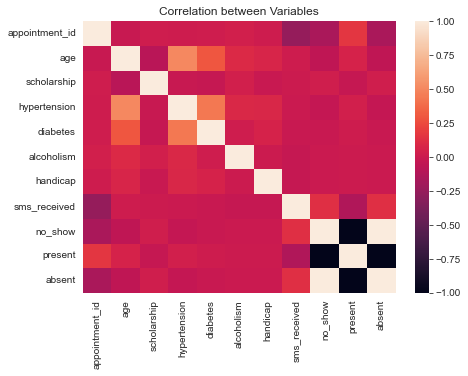

In [26]:
## First let us plot a correlation matrix to see how the variables interact with each other

plt.figure(figsize=(7,5))
corr = df.corr()
sns.heatmap(corr,)
plt.title('Correlation between Variables',);

In [27]:
## Get the counts and averages for both sets of patients

df.groupby('present').mean()

,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,absent
present,,,,,,,,,,
False,5.652258e+06,34.306820,0.115522,0.169027,0.064080,0.030337,0.020165,0.438430,1.0,1.0
True,5.681134e+06,37.787297,0.093908,0.204392,0.073841,0.030418,0.022732,0.291339,0.0,0.0


In [28]:
df['present'].value_counts()

True     88203
False    22316
Name: present, dtype: int64

We can see that the number of patients who did not go for their appointments is much lesser than those who went.

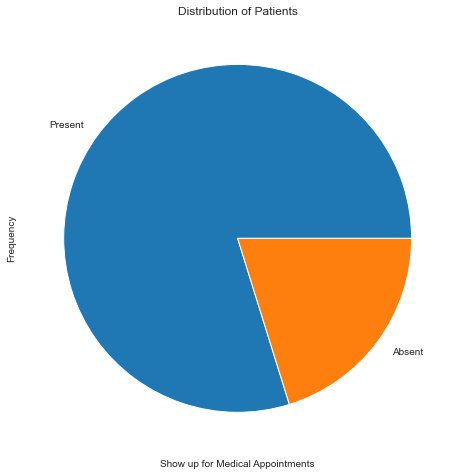

In [29]:
## For a visual representation of the comparison

df['present'].value_counts().plot.pie(labels=['Present', 'Absent'], figsize = (8,8))
plt.title('Distribution of Patients')
plt.xlabel('Show up for Medical Appointments')
plt.ylabel('Frequency')
plt.legend;

This confirms that more patients were present for medical appointments than were absent.

#### 2. How do the ages of patients who showed up to their appointments compare against the ages of patients who did not show up?


In [30]:
## Get averages of patients who were present for their appointment based on their age

df.age[present].mean()

37.78729748421256

In [31]:
df.age[absent].mean()

34.30682021867718

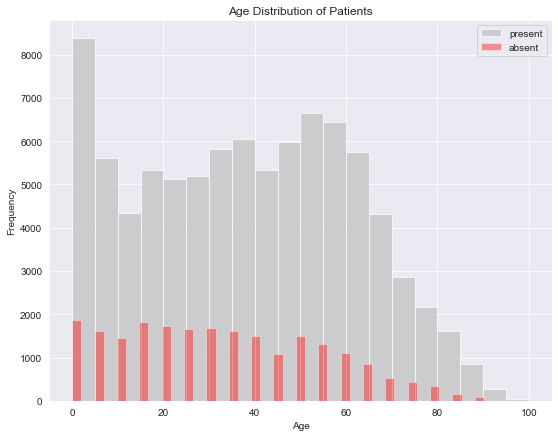

In [32]:
## Plot a distribution for clearer visuals.

df.age[present].hist(alpha=0.7, bins=20, color='silver', label='present')
df.age[absent].hist(width=2, alpha=0.4, bins=20, color='red', label='absent', figsize=(9,7))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')
plt.legend();

On average, it seems the people who were absent the most for their medical appointments were younger patients, especially infants and toddlers.

Also, middle-adulthood patients (from about 45-65years of age) as well as babies seemed to show up more frequently to medical appointments.

#### 3. Were patients enrolled in the Bolsa Familia welfare program more frequent to appointments than those who weren't?

In [33]:
# Let us replace '0' & '1' with 'no' & 'yes' respectively

df['scholarship'] = df['scholarship'].map({1: 'yes', 0: 'no'})

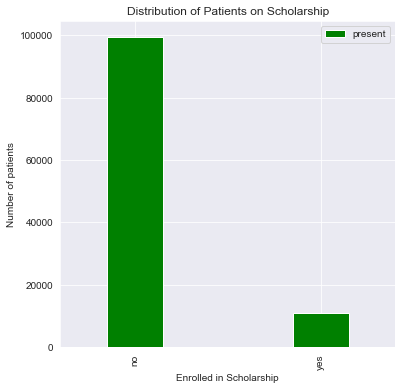

In [34]:
# Plot visuals with proper labels

df.groupby('scholarship').present.count().plot.bar(width=0.3, color='g', figsize=(6,6))
plt.xlabel('Enrolled in Scholarship')
plt.ylabel('Number of patients')
plt.title('Distribution of Patients on Scholarship')
plt.legend();

We can clearly see that patients who were not the scholarship program showed up very frequently for their medical appointments than those who were on scholarship.

#### 4. Which gender showed up more frequently for medical appointments?

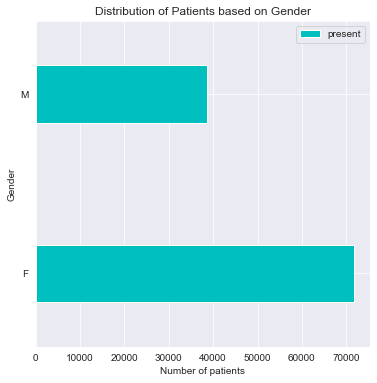

In [35]:
## Create plot with proper labels.

df.groupby('gender').present.count().plot.barh(width=0.32, color='c', figsize=(6,6))
plt.xlabel('Number of patients')
plt.ylabel('Gender')
plt.title('Distribution of Patients based on Gender')
plt.legend();

It appears that the female patients showed up quite often than the male patients.

#### 5. On which days of the week did patients show up the most for medical appointments?

In [36]:
# Return the number of patients who were present according to weekday

df.groupby(['appointment_weekday']).present.value_counts()

appointment_weekday  present
Friday               True       14981
                     False       4037
Monday               True       18023
                     False       4689
Saturday             True          30
                     False          9
Thursday             True       13908
                     False       3336
Tuesday              True       20487
                     False       5152
Wednesday            True       20774
                     False       5093
Name: present, dtype: int64

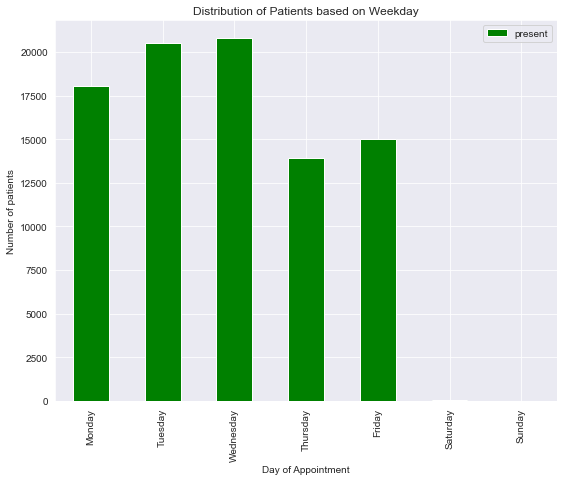

In [37]:
# Sort by weekday and plot a bar chart with proper labels

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(['appointment_weekday']).present.sum().reindex(cats).plot.bar(color=('g'), figsize=(9,7))
plt.xlabel('Day of Appointment')
plt.ylabel('Number of patients')
plt.title('Distribution of Patients based on Weekday')
plt.legend();

More patients showed up on Tuesday & Wednesday than on any other day of the week, and also, just a handful of patients showed up on Saturdays with none showing up on Sundays, which might suggest unavailability of medical personnel on the weekends.

#### 6. Is there any correlation between the days patients registered for appointments and how often they made it to their appointments?

In [38]:
# Number of patients registered for appointment according to weekday

df.groupby(['scheduled_weekday']).present.value_counts()

scheduled_weekday  present
Friday             True       15028
                   False       3886
Monday             True       18522
                   False       4559
Saturday           True          23
                   False          1
Thursday           True       14372
                   False       3700
Tuesday            True       20875
                   False       5291
Wednesday          True       19383
                   False       4879
Name: present, dtype: int64

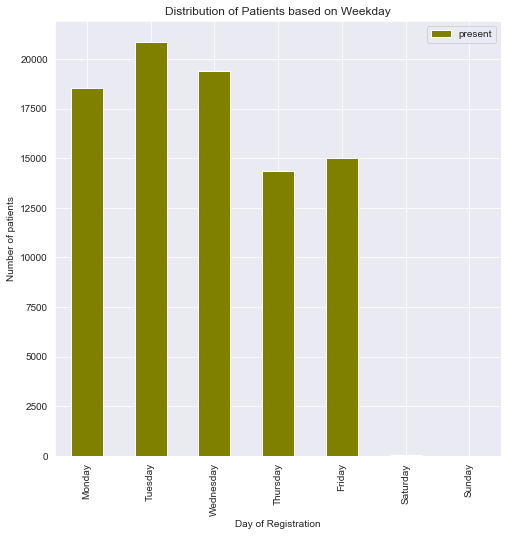

In [39]:
# Plot chart with proper labels

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(['scheduled_weekday']).present.sum().reindex(cats).plot.bar(color=('olive'), figsize=(8,8))
plt.xlabel('Day of Registration')
plt.ylabel('Number of patients')
plt.title('Distribution of Patients based on Weekday')
plt.legend();

Similar to appointment dates, patients who were registered on Tuesdays & Wednesdays showed up more frequently to their appointments and the ones registered on Saturdays hardly ever showed up. This could suggest the availability of one or more senior medical personnels on the peak days and/or a routine medical check-up like ante-natal, considering female patients visited very often.

#### 7. Did the patients that received SMS texts show up more often than those that didn't receive texts?

In [40]:
## Let us get the numbers for both categories of patients

df.groupby('sms_received').present.count()

sms_received
0    75038
1    35481
Name: present, dtype: int64

In [41]:
df['sms_received'] = df['sms_received'].map({1: 'yes', 0: 'no'})

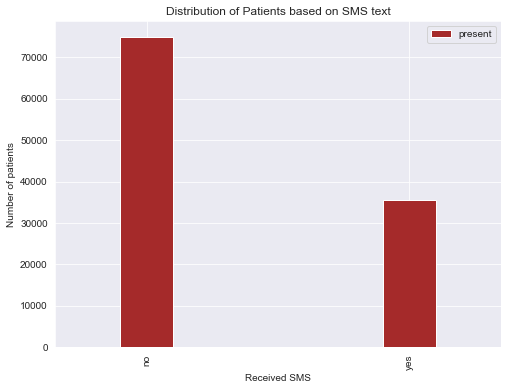

In [42]:
## Create a plot

df.groupby('sms_received').present.count().plot.bar(width=0.2, color='brown', figsize=(8,6))
plt.xlabel('Received SMS')
plt.ylabel('Number of patients')
plt.title('Distribution of Patients based on SMS text')
plt.legend();

Oddly, we see that patients who recieved SMS texts showed up less frequently than those who didn't.

#### 8. Which neighbourhoods showed up more often and which neighbourhoods showed up least often for medical appointments?

In [43]:
## Get the top 10 and least 10 neighbourhoods that showed up for appointments.

top_neighbourhoods = df.groupby('neighbourhood').present.count().reset_index(name='count').sort_values('count',ascending=False).head(10)
top_neighbourhoods

,neighbourhood,count
38,JARDIM CAMBURI,7717
43,MARIA ORTIZ,5804
59,RESISTÊNCIA,4431
39,JARDIM DA PENHA,3877
36,ITARARÉ,3514
10,CENTRO,3334
78,TABUAZEIRO,3132
66,SANTA MARTHA,3131
40,JESUS DE NAZARETH,2853
8,BONFIM,2773


In [44]:
least_neighbourhoods = df.groupby('neighbourhood').present.count().reset_index(name='count').sort_values('count',ascending=False).tail(10)
least_neighbourhoods

,neighbourhood,count
79,UNIVERSITÁRIO,152
72,SEGURANÇA DO LAR,145
49,NAZARETH,135
47,MORADA DE CAMBURI,96
54,PONTAL DE CAMBURI,69
31,ILHA DO BOI,35
32,ILHA DO FRADE,10
0,AEROPORTO,8
34,ILHAS OCEÂNICAS DE TRINDADE,2
51,PARQUE INDUSTRIAL,1


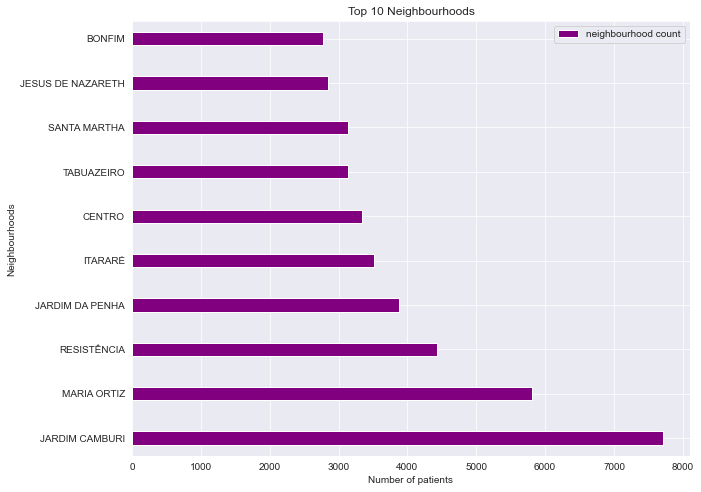

In [45]:
## Plot bar charts for visualization

top_neighbourhoods.plot.barh(x='neighbourhood', y='count', label='neighbourhood count', width=0.3, color='purple', figsize=(10,8))
plt.xlabel('Number of patients')
plt.ylabel('Neighbourhoods')
plt.title('Top 10 Neighbourhoods')
plt.legend();

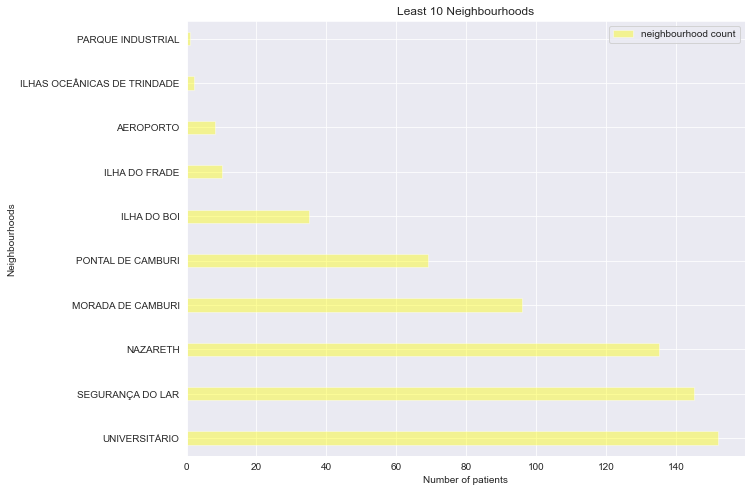

In [46]:
least_neighbourhoods.plot.barh(x='neighbourhood', y='count', label='neighbourhood count', width=0.3, color='yellow', alpha=.4, figsize=(10,8))
plt.xlabel('Number of patients')
plt.ylabel('Neighbourhoods')
plt.title('Least 10 Neighbourhoods')
plt.legend();

From the plots we can see that __Jardim Camburi__ holds the record for the most show ups to medical appointments with over 7000 patients, and coversely, __Parque Industrial__ has the least record of patients who showed up for medical appointments.

#### 9. Do medical conditions determine how frequent patients show up for medical appointments?

In [47]:
## For this, we will attempt to create a single separate column, 'condition', containing values from 'hypertension, diabetes,
# handicap, alcholism' columns for an easy graphical plot.

def condition_(row):
    if row['hypertension'] == 1:
        return 'hypertensive'
    if row['diabetes'] == 1:
        return 'diabetic'
    if row['handicap'] == 1:
        return 'handicap'
    if row['alcoholism'] == 1:
        return 'alcoholic'
    if row['hypertension'] + row['diabetes'] + row['handicap'] + row['alcoholism'] > 1:
        return 'multiple'

In [48]:
## Apply new column to original dataframe and check to confirm changes

df.apply (condition_, axis=1)
df['condition'] = df.apply(lambda row: condition_(row), axis=1)
df.head(2)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,present,absent,scheduled_weekday,appointment_weekday,condition
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,no,1,0,0,0,no,0,True,False,Friday,Friday,hypertensive
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,no,0,0,0,0,no,0,True,False,Friday,Friday,None


In [49]:
## Explore the different health conditions as it relates to how frequent patients showed up.

df.groupby('condition').present.value_counts().reset_index(name='count').sort_values('count', ascending=False).head()

,condition,present,count
6,hypertensive,True,18028
7,hypertensive,False,3772
0,alcoholic,True,1509
2,diabetic,True,1168
4,handicap,True,896


In [50]:
med_condition = df[df['present']==True]['condition'].value_counts()
med_condition

hypertensive    18028
alcoholic        1509
diabetic         1168
handicap          896
multiple           93
Name: condition, dtype: int64

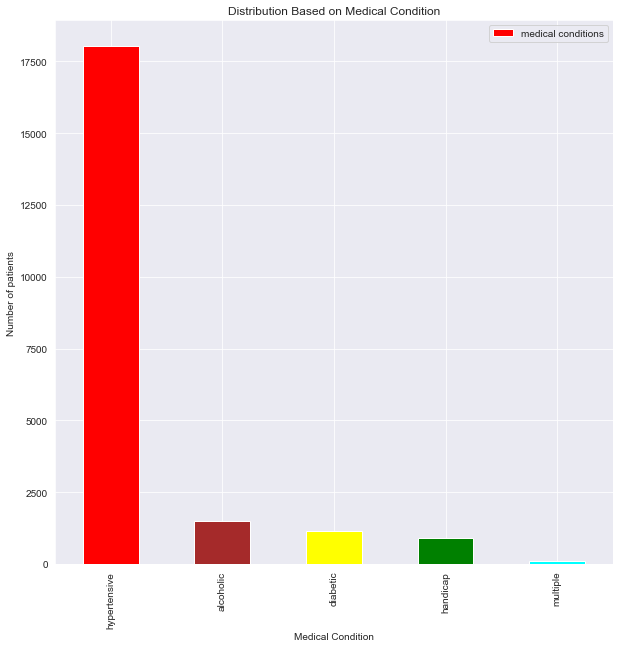

In [51]:
# Plot visuals with proper labels

med_condition.plot.bar(x='condition', y='count', label='medical conditions', color=('red', 'brown', 'yellow', 'green', 'cyan'), figsize=(10,10))
plt.xlabel('Medical Condition')
plt.ylabel('Number of patients')
plt.title('Distribution Based on Medical Condition')
plt.legend();

We see that hypertensive patients visited very often, whereas, handicap patients showed up the least number of times for medical appointments.

#### 10. What is the correlation between the patients' medical conditions and their ages?

In [52]:
## Get the age range for each medical condition

range_df = pd.DataFrame()
range_df['age'] = range(100)
condition_diabetes = range_df.age.apply(lambda x:len(df[(df.age == x) & (df.condition == 'diabetic')]))
condition_handicap = range_df.age.apply(lambda x:len(df[(df.age == x) & (df.condition == 'handicap')]))
condition_hypertension = range_df.age.apply(lambda x:len(df[(df.age == x) & (df.condition == 'hypertensive')]))
condition_alcoholism = range_df.age.apply(lambda x:len(df[(df.age == x) & (df.condition == 'alcoholic')]))
condition_multiple = range_df.age.apply(lambda x:len(df[(df.age == x) & (df.condition == 'multiple')]))


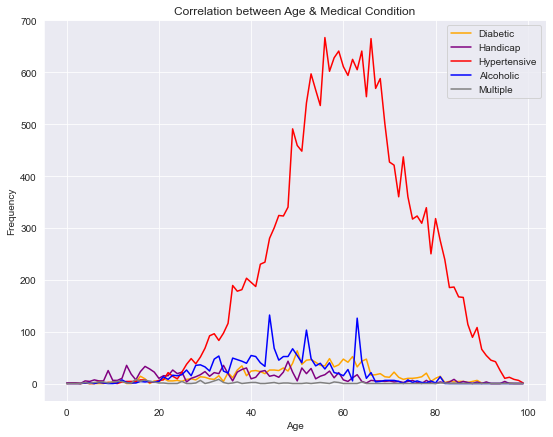

In [53]:
# Create visuals with proper labels

plt.figure(figsize=(9,7)) 
plt.plot( range_df, condition_diabetes, marker='', color='orange', linewidth=1.5)
plt.plot( range_df, condition_handicap, marker='', color='purple', linewidth=1.5)
plt.plot( range_df, condition_hypertension, marker='', color='red', linewidth=1.5)
plt.plot( range_df, condition_alcoholism, marker='', color='blue', linewidth=1.5)
plt.plot( range_df, condition_multiple, marker='', color='grey', linewidth=1.5)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Correlation between Age & Medical Condition')
plt.legend(['Diabetic', 'Handicap', 'Hypertensive', 'Alcoholic', 'Multiple']);

We can see that the vast majority of patients with medical conditions are in the middle adulthood age group with most of them being either hypertensive , diabetic or alcholic.

<a id='conclusions'></a>
## Conclusions

> From our analysis, we confirmed the correlation between multiple independent variables and the patients who showed up to their medical appointments and also some signficant difference in statistics of patients who showed up over those who did not show up to medical appointments. From our exploratory analysis:
1. Middle aged adults (from about 45-65years of age) were more punctual to appointments than any other age group and notably, little children at infancy age did not show up for medical appointments.
2. Patients enrolled in the Bolsa Welfare family program did not show up to appointments nearly as often as patients who were not enrolled in the program which begs further questions not deducible from the data provided.
3. Female patients were more punctual to medical appointments than their male counterparts. This could be as a result of pregnant women visiting for routine ante-natal or post-natal care.
4. Mondays, Tuesdays and Wednesdays had the most number of patients that made it to the hospital for their appointments and on the contrary, the weekends, particularly Saturdays, recorded the least number of patients. Similarly, patients registered on Tuesdays and Wednesdays also showed up very frequently, and the reverse was also the case for those registered on Saturdays.
5. Interestingly, patients who received SMS text notifications did not show up to appointments nearly as often as the patients who did not receive SMS texts. Possibly, the numbers could have been different if more patients received SMS text notifications.
6. A vast majority of the patients showed up at Jardim Camburi while Parque Industrial recorded the least number of patients which could be as a result of population density or availability of medical personnel and/or equipment.
7. Hypertensive patients visited the clinic most often, followed by alcoholic & diabetic patients while the handicap patients visited the least number of times than patients with other medical conditions. We could also see that most of the hypertensive patients seemed to be middle aged adults while most of the handicap patients seemed to be children.

### Limitations
> Some extra features such as _'employment status'_ and _'geographic information'_ could have helped us analyze the dataset better to understand why patients who received SMS text notifications for instance, did not show up to their medical appointments. Also, a larger dataset covering a wider time period would have provided more parameters for a more robust analysis.


In summary, factors such as a patient's __medical condition, location,__ & __day of the week__ scheduled for appointment can help us predict whether or not they would show up to their scheduled medical appointment.

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295